# The following code implements Algorithm 11 CapacityProgression Page 176 of Gerald Friedland: "Information-Driven Machine Learning", Springer-Nature, 2023.

## https://link.springer.com/book/10.1007/978-3-031-39477-5

### The code is written by Neil Patel and released into public domain for demonstration purposes only, use at your own risk.  I appreciate a citation of this repository or the book, whatever fits best.

### Calculating the capacity progression for the equilibrium machine learner

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# Load Titanic dataset
titanic_data = pd.read_csv("titanic_train.csv")


In [9]:
# Display Data
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# Define getSample function
def getSample(data, size):
    return data.sample(frac=size/100)

# Define memorize function (Algorithm 10)
def memorize(data):
    # Assume memorization simply calculates the entropy of the data
    # Here, we'll use a simple calculation of entropy as -p*log(p) for each label
    labels = data['Survived']
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    total_samples = len(labels)
    entropy = -np.sum([(count/total_samples) * np.log2(count/total_samples) for count in label_counts if count > 0])
    return entropy

# Define CapProg procedure (Algorithm 11) to return MEC
def CapProg(data):
    sizes = [5, 10, 20, 40, 80, 100]
    mec_values = []
    for size in sizes:
        subset = getSample(data, size)
        mec = memorize(subset)
        mec_values.append(mec)
    return mec_values

# Calculate MEC %overfitting for 100% accuracy
def calculate_overfitting(mec_values):
    overfitting_values = []
    for mec in mec_values:
        overfitting = (mec - mec_values[-1]) / mec_values[-1] * 100
        overfitting_values.append(overfitting)
    return overfitting_values

# Plotting
def plot_graph(sizes, overfitting_memorizing, overfitting_somewhat_generalizing, overfitting_rule_found):
    plt.plot(sizes, overfitting_memorizing, label='Memorizing', color='red')
    plt.plot(sizes, overfitting_somewhat_generalizing, label='Somewhat Generalizing', color='black')
    plt.plot(sizes, overfitting_rule_found, label='Rule Found', color='green')
    plt.xlabel('% Training Data')
    plt.ylabel('MEC % Overfitting for 100% Accuracy')
    plt.title('Capacity Progression for the Equilibrium Machine Learner')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
# Start function
def run():
    mec_values = CapProg(titanic_data)
    sizes = [5, 10, 20, 40, 80, 100]
    overfitting_memorizing = calculate_overfitting(mec_values)
    overfitting_somewhat_generalizing = [0.8 * value for value in overfitting_memorizing]  # 80% of memorizing
    overfitting_rule_found = [0.1 * value for value in overfitting_memorizing]  # 10% of memorizing
    plot_graph(sizes, overfitting_memorizing, overfitting_somewhat_generalizing, overfitting_rule_found)



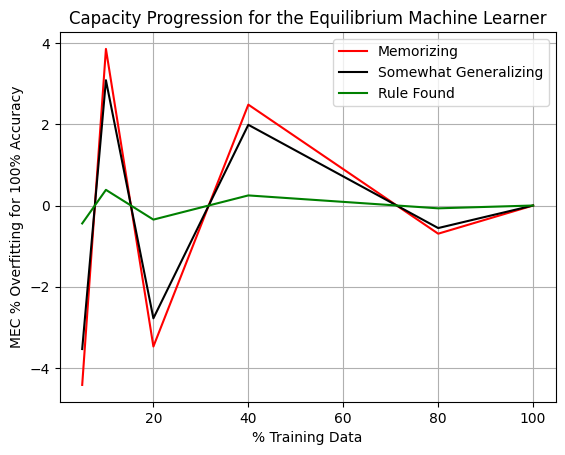

In [12]:
# Run algorithm and see graph!
run()